In [50]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
#metrics是評估辨識準確度集報表

Fit():求得訓練集X的平均值、平方差、最大/小值等固有屬性，可以理解為一個訓練過程

Transform():在fit()的基礎上進行標準化、降維等操作(如 PCA)

Fit_transform():包括了訓練及轉換(即上述兩個總和)

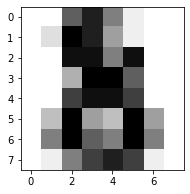

In [34]:
digits = datasets.load_digits()

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


利用以下code觀察資料集   
8*8張影像,有1797張   
名字就是1~10(資料集就是在判斷圖片上數字)    
target就是正確答案   

In [35]:
for key,value in digits.items():
   try:
    print(key,value.shape)
   except:
    print(key)  


data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


In [36]:
print(digits['DESCR']) #直接 digits.DESCR很醜看不懂

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

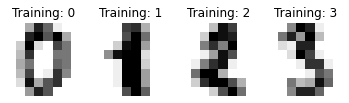

In [48]:
#觀察一下train data
images_and_labels = list(zip(digits.images, digits.target))
for index,(image,label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

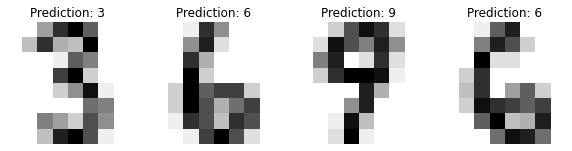

In [53]:
#train and classify
n_samples = len(digits.images)
# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples,-1))
# 產生SVC分類器
clf  = svm.SVC(gamma=0.001)
#這裡kernel function 是RBF (radial basis function):exp(-γ|x-x'|^2)
#上面gamma 參數就是數學式中的γ,γ>0

#切分資料,切0.8, 0.2

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False)

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

#呈現預測結果
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

機器學習: Kernel 函數   

https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-kernel-%E5%87%BD%E6%95%B8-47c94095171

In [43]:
#看來預測結果至少前10個是對的,
print(expected[:10])
print(predicted[:10])

[8 8 4 9 0 8 9 8 1 2]
[8 8 4 9 0 8 9 8 1 2]


In [44]:
#利用 Confusion matrix 來分類準確度統計
print("Confusion matrix:\n%s"% metrics.confusion_matrix(expected, predicted))
#解讀邏輯
#row1為針對數字0的預測與真實的差異,row1 list中的位置[0~9]分別代表數字0~9,第一個87是判斷為0的次數,其他出現的數字是指判斷錯誤的次數,
#因此row1可以解讀為預測為0正確87次 判斷錯誤:判斷為4 >>>1次

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


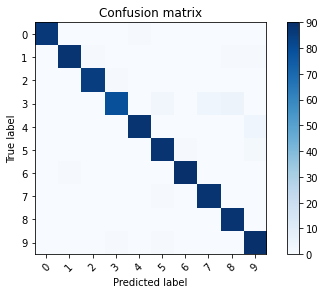

In [45]:
#將上面的矩陣視覺化吧~~~
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

True Positive | False Positive | False Negative | True Negative|
--- | --- | --- | ----|
實際為3且判斷為3，共79個|判斷為3但判斷錯誤，共2個|實際為3但判斷錯誤，共12個|實際不為3，且判斷正確,899-79-2-12=885個

precision, recall, f1-score來評估精確度  
計算邏輯如下以3為例:   
precision = TP/(TP+FP) = 79/81 = 0.98   
判斷為3且實際為3的比例為0.98   
recall = TP/(TP+FN) = 79/91 = 0.87   
實際為3且判斷為3的比例為0.87   
f1-score 則為以上兩者之「harmonic mean 調和平均數」   
f1-score= 2 x precision x recall/(recision + recall) = 0.92   

In [46]:
#以程式碼表示
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

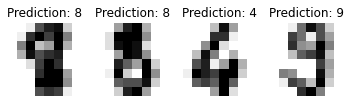

In [47]:
images_and_predictions = list(
                        zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

reference:  
Recognizing hand-written digits    
https://machine-learning-python.kspax.io/   
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/   
